In [1]:
from ROOT import TFile, TH1F, TCanvas
from setStyle import setStyle, TLegend
import math
setStyle()

Welcome to JupyROOT 6.22/02


In [2]:
atlasF = TFile.Open("/atlasfs02/a/users/whopkins/sheffNtuples/SheffieldNtuples_v21.2.71-SRABC-PostFAR-Signals/mc16_13TeV.436163.MGPy8EG_A14N23LO_TT_directTT_1200_1.e6985_a875_r9364_p3712_stop0L.root")
delphesF = TFile.Open("/atlasfs02/c/users/whopkins/stop2LSP_delphes/stop2topLSP_1200_1_flat.root")

atlasT = atlasF.Get("NominalFixed")
delphesT = delphesF.Get("Nominal")

In [8]:
binning = {
    "nj_good":[20,0,20],
    # "num_bjets":[10,0,10],
    "pT_1jet":[20,0,1600],
    "pT_2jet":[20,0,1000],
    "pT_3jet":[20,0,800],
    "pT_4jet":[20,0,800],
    # "eta_1jet":[20,-4,4],
    # "eta_2jet":[20,-4,4],
    # "eta_3jet":[20,-4,4],
    # "eta_4jet":[20,-4,4],
    # "pT_5jet":[20,0,800],
    # "MET":[20,0,2000],
    "MTbmin":[20,0,2000],
    # "dphimin1":[30, 0, math.pi],
    # "dphimin2":[30, 0, math.pi],
    # "dphimin3":[30, 0, math.pi],
    "dphimin4":[30, 0, math.pi],
    #"HT":[30, 0, 3000],
}
nameConv = {
    "MET":"eT_miss",
}
hists = {}
for var in binning:
    hists[var] = TH1F(f"{var}_hist", "", *binning[var])
    
atlas_hists = {}
for var in hists:
    atlas_var = var
    if var in nameConv:
        atlas_var = nameConv[var]
    atlas_hists[atlas_var] = TH1F(f"{atlas_var}_atlas_hist", "", *binning[var])

precut = "(MTbmin>50 && pT_2jet > 80 && pT_4jet > 40 && num_bjets>=2 && nj_good>=4)"
#precut = "(1)"

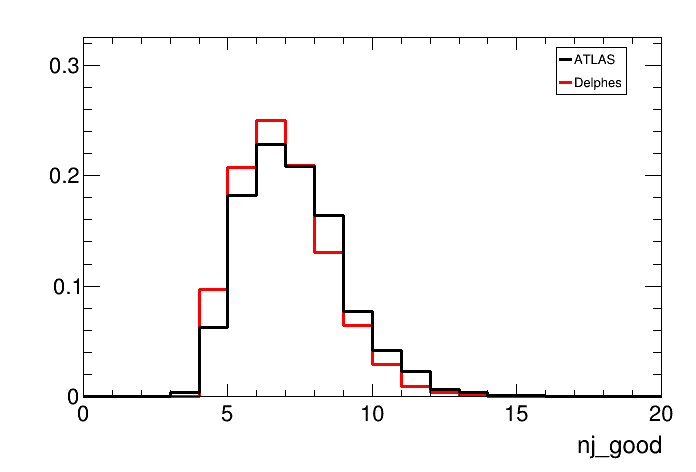

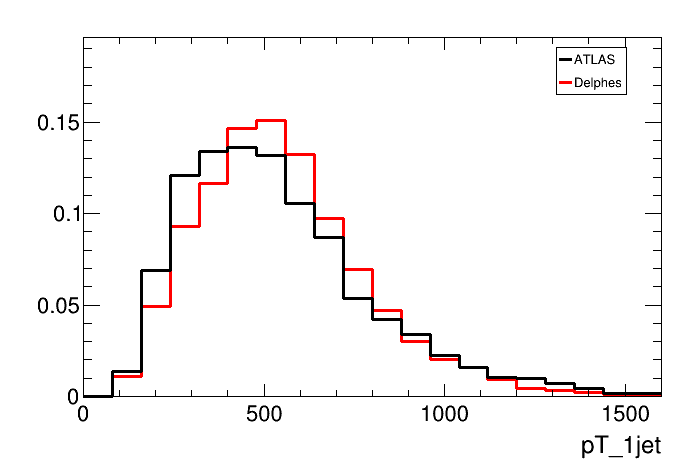

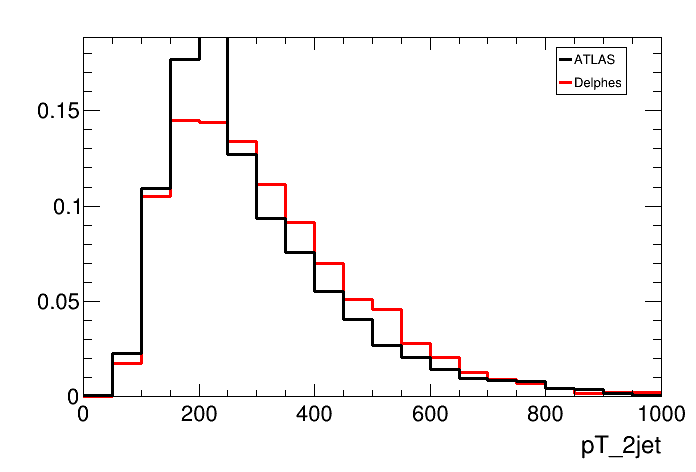

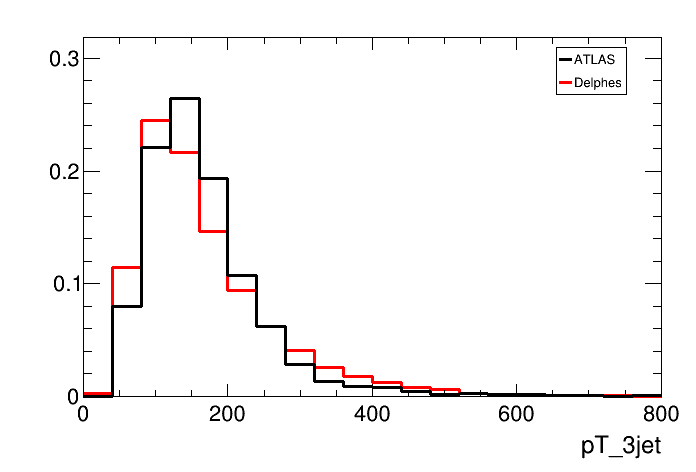

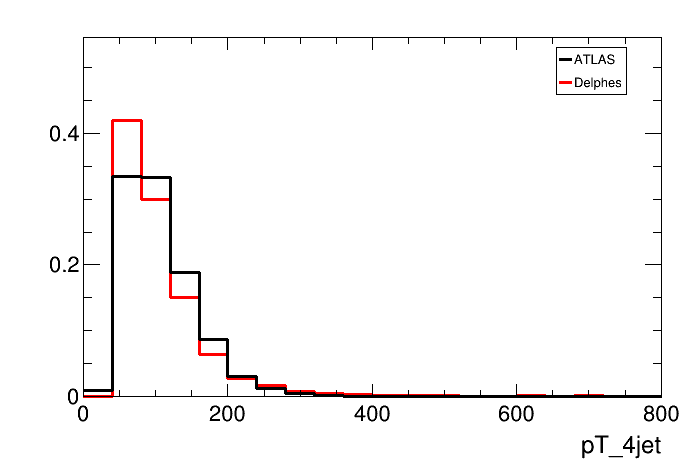

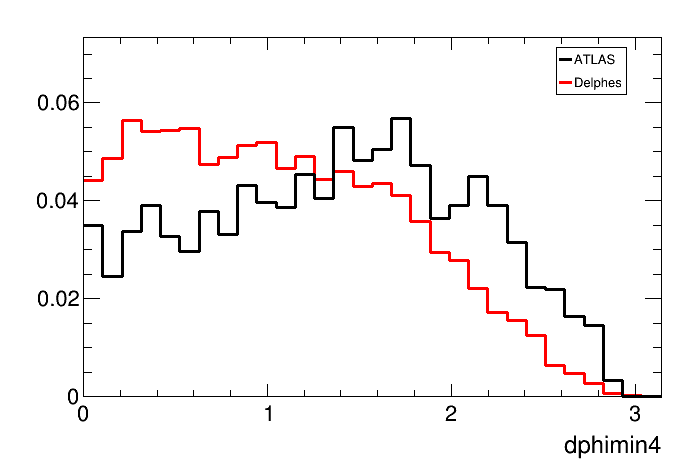

In [9]:
canvases = {}
leg = TLegend(0.8, 0.8, 0.9, 0.9)
leg.AddEntry(atlas_hists['nj_good'], 'ATLAS', 'l')
leg.AddEntry(hists['nj_good'], 'Delphes', 'l')
for var in hists:
    canvases[var] = TCanvas(f"c_{var}", "")
    hist=hists[var]
    delphesT.Draw(f'{var}>>{var}_hist', precut)
    hist.Scale(1./hist.Integral())
    hist.SetLineColor(2)
    atlas_var = var
    if var in nameConv:
        atlas_var = nameConv[var]
    atlas_hist=atlas_hists[atlas_var]
    atlasT.Draw(f'{atlas_var}>>{atlas_var}_atlas_hist')
    atlas_hist.Scale(1./atlas_hist.Integral())

    canvases[var].Clear()
    
    hist.Draw("hist")    
    atlas_hist.Draw("histsame")
    leg.Draw()
    hist.GetXaxis().SetTitle(var)
    hist.GetYaxis().SetRangeUser(0,hist.GetMaximum()*1.3)
    canvases[var].Draw()